In [1]:
# To enable autcomplete
%config IPCompleter.greedy=True

In [2]:
import datetime # to get current date and time
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from twitterscraper import query_tweets_from_user

%matplotlib inline

# Raw state csv pulled from New York Times Github
url1 = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv'
states= pd.read_csv(url1)

# Raw county csv pulled from New York Times Github
url2 = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv'
county = pd.read_csv(url2)

INFO: {'User-Agent': 'Mozilla/5.0 (Windows; U; Windows NT 6.1; x64; fr; rv:1.9.2.13) Gecko/20101203 Firebird/3.6.13'}


In [3]:
states

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0
...,...,...,...,...,...
3529,2020-05-05,Virginia,51,20256,713
3530,2020-05-05,Washington,53,15847,863
3531,2020-05-05,West Virginia,54,1242,50
3532,2020-05-05,Wisconsin,55,8566,353


In [4]:
# Isolate state data for New Jersey

# loc isolates data based on labels, save as new dataframe
nj = states.loc[states['state'] == "New Jersey"]
nj

,date,state,fips,cases,deaths
292,2020-03-04,New Jersey,34,1,0
312,2020-03-05,New Jersey,34,2,0
337,2020-03-06,New Jersey,34,4,0
368,2020-03-07,New Jersey,34,4,0
403,2020-03-08,New Jersey,34,6,0
...,...,...,...,...,...
3290,2020-05-01,New Jersey,34,121190,7538
3345,2020-05-02,New Jersey,34,123717,7742
3400,2020-05-03,New Jersey,34,126744,7871
3455,2020-05-04,New Jersey,34,128269,7910


In [5]:
# Determine days of outbreak

totalDays = nj.shape[0] # get number of rows containing NJ
njLength = np.linspace(1,totalDays,totalDays)
njCases = np.array(nj["cases"])

In [6]:
# Get current date and time

# now method returns date and time
now = datetime.datetime.now()
# I returns hour in 12 hour format, p returns AM or PM based on time
dateAndTime = now.strftime("%m/%d/%Y %I:%M %p")

In [7]:
# Get last date of available data
recentDate = county.at[county.index[-1], 'date']

# Isolate NJ Counties for given date
njCountyList = county[(county['state'] == "New Jersey") & (county["date"] == recentDate)]

njCountyList

,date,county,state,fips,cases,deaths
117080,2020-05-05,Atlantic,New Jersey,34001.0,1190,51
117081,2020-05-05,Bergen,New Jersey,34003.0,16460,1261
117082,2020-05-05,Burlington,New Jersey,34005.0,3207,164
117083,2020-05-05,Camden,New Jersey,34007.0,4251,180
117084,2020-05-05,Cape May,New Jersey,34009.0,369,26
117085,2020-05-05,Cumberland,New Jersey,34011.0,985,23
117086,2020-05-05,Essex,New Jersey,34013.0,14840,1319
117087,2020-05-05,Gloucester,New Jersey,34015.0,1467,61
117088,2020-05-05,Hudson,New Jersey,34017.0,16099,870
117089,2020-05-05,Hunterdon,New Jersey,34019.0,679,38


C:\Users\jayde\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RankWarning: The fit may be poorly conditioned
  if sys.path[0] == '':


last updated at: 05/06/2020 03:39 PM


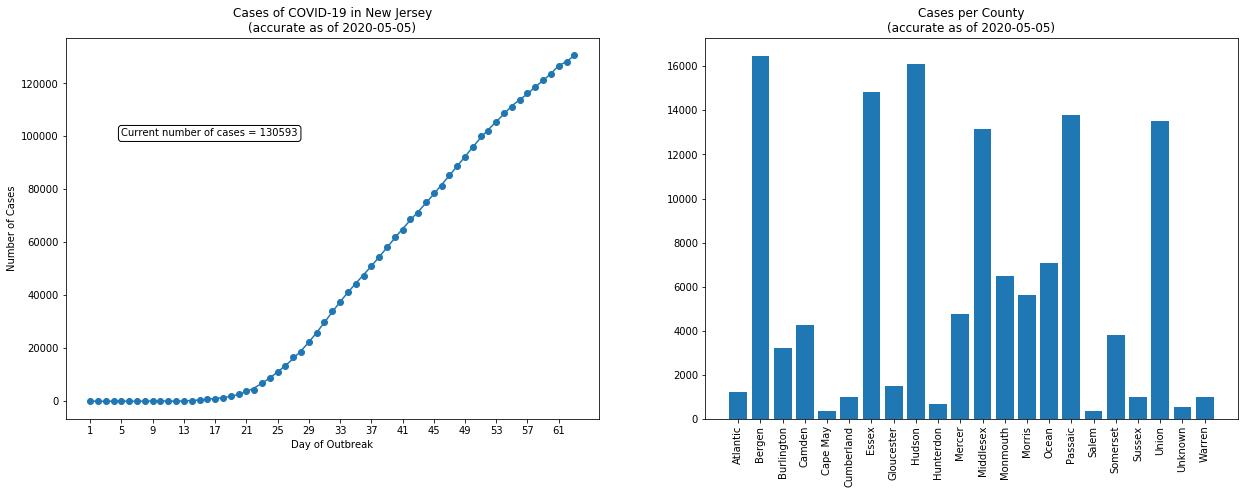

In [49]:
# Create figure object with two subplots oriented horizontally
figure, (sc, ba) = plt.subplots(1,2, figsize=(21,7))

# Plot NJ cases vs time
sc.scatter(njLength, njCases)
sTitle = "Cases of COVID-19 in New Jersey\n(accurate as of " + recentDate + ")"
sc.set_title(sTitle)
sc.set_xlabel("Day of Outbreak")
sc.set_ylabel("Number of Cases")

# Fit curve to data 
coefficients = np.polynomial.polynomial.polyfit(njLength, njCases, njLength.shape[0]);
fit = np.polynomial.polynomial.polyval(njLength,coefficients);
sc.plot(njLength, fit);

# adjust ticks to show all days
xticks = np.arange(1,njLength.max()+1,4)
sc.set_xticks(xticks); # semicolon suppresses output of this function

# Create box label
labelText = "Current number of cases = " + str(njCases.max())
box = dict(boxstyle = 'round', facecolor = 'white')
sc.text(5, 100000,labelText,bbox=box);

# Plot cases per county
ba.bar(njCountyList['county'], njCountyList['cases'] )
bTitle = "Cases per County\n(accurate as of " + recentDate + ")"
ba.set_xticklabels(njCountyList['county'], rotation = 90);
ba.set_title(bTitle);

print("last updated at: {}".format(dateAndTime))

last updated at: 05/06/2020 03:39 PM


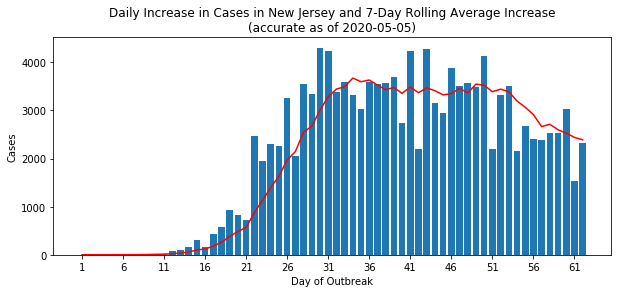

In [55]:
# Create list of the increase in cases between each day and rate of change
newCases = []

for i in range(0, len(njCases)-1):
    newCases.append(njCases[i+1]-njCases[i]) # subtract current number of cases by previous number

newCases = np.array(newCases) # convert case number list to array
numDaysExceptLast = len(njLength) # need to remove last day from list
newCaseDays = np.arange(1, numDaysExceptLast) # convert day list to array

# Plot daily increase
ticks = np.arange(1,newCaseDays.max()+1,5); #generate x ticks
fig= plt.figure(figsize=(10,4)) # create figure
axes = fig.add_subplot() # automatically adds axis (graph) in default position
axes.bar(newCaseDays, newCases.transpose())
axes.set_title("Daily Increase in Cases in New Jersey and 7-Day Rolling Average Increase\n(accurate as of "
               + recentDate + ")");
axes.set_xticks(ticks);
axes.set_xlabel("Day of Outbreak");
axes.set_ylabel("Cases");
print("last updated at: {}".format(dateAndTime))

'''
Adding line tracing 7 day rolling average increase in cases

Because data can be unreliable at any given day, a rolling average allows for 
visualization of trends over a longer period of time, which is more reliable.

At each day in the tracker, the mean is taken of the daily increases over the previous 6 days. 
For days 1-6, there are not 6 days worth of data, so the average is taken with all days up until that point.
After day 6, the starting variable increases by 1 to trail 6 days behind the current day's data, leaving 7 days in
between to calculate the average.
'''
meanCaseIncrease = []

sevenDayStart = 0
for i in range(len(newCases)):
    if i > 6: # trail by 6 days once 6 days of data are available, so average of 7 days can be taken
        sevenDayStart+=1
    # mean of previous 6 days, i+1 to avoid taking mean of empty space after last day of data
    meanCaseIncrease.append(np.mean(newCases[sevenDayStart:i+1])); 
    
plt.plot(newCaseDays, meanCaseIncrease, color = 'r');

COVID-19 Hospitalizations in New Jersey:<br>Unlike case numbers, there is no direct source for all of the hospitalizations in New Jersey. However, the Governor of New Jersey started reporting hospitalizations almost every day (with some exceptions) from April 9th on his Twitter account, @GovMurphy. While the data from this account is incomplete, it is the only place reporting these values. The following code scrapes Twitter for the governor's tweets relating to hospitalization rates, parses each tweet for the correct number of hospitalizations, and then plots the values.

In [10]:
'''
The following lines search for tweets by the query in the quotes. This was used in previous versions of this script but has
been replaced by searching directly by username.

# Create Date Objects for start and end of data
startDate = datetime.date(2020, 4, 8)
endDate = datetime.date.today() + datetime.timedelta(days=1) # have to use tomorrow's date to include tweets from today
print(startDate)
print(endDate)
limit = 10000 # max number of tweets that will be grabbed
lang = 'english'
#username = GovMurphy
tweets = query_tweets("Phil Murphy", begindate = startDate, enddate = endDate, limit = limit, lang = lang)
'''
# scrape all tweets from this user
tweet = query_tweets_from_user("GovMurphy")

INFO: Scraping tweets from https://twitter.com/GovMurphy
INFO: Using proxy 118.173.232.170:44029
INFO: Scraping tweets from https://twitter.com/i/profiles/show/GovMurphy/timeline/tweets?include_available_features=1&include_entities=1&max_position=1258082870532472832&reset_error_state=false
INFO: Using proxy 125.27.251.57:41425
INFO: Scraping tweets from https://twitter.com/i/profiles/show/GovMurphy/timeline/tweets?include_available_features=1&include_entities=1&max_position=1257728769890177025&reset_error_state=false
INFO: Using proxy 5.59.141.152:61981
INFO: Scraping tweets from https://twitter.com/i/profiles/show/GovMurphy/timeline/tweets?include_available_features=1&include_entities=1&max_position=1257719254889238529&reset_error_state=false
INFO: Using proxy 31.133.57.134:41258
INFO: Scraping tweets from https://twitter.com/i/profiles/show/GovMurphy/timeline/tweets?include_available_features=1&include_entities=1&max_position=1257408289903726592&reset_error_state=false
INFO: Using pr

INFO: Scraping tweets from https://twitter.com/i/profiles/show/GovMurphy/timeline/tweets?include_available_features=1&include_entities=1&max_position=1251194751824642055&reset_error_state=false
INFO: Using proxy 78.153.120.33:39193
INFO: Scraping tweets from https://twitter.com/i/profiles/show/GovMurphy/timeline/tweets?include_available_features=1&include_entities=1&max_position=1250838597479149571&reset_error_state=false
INFO: Using proxy 185.61.92.228:33060
INFO: Scraping tweets from https://twitter.com/i/profiles/show/GovMurphy/timeline/tweets?include_available_features=1&include_entities=1&max_position=1250808208140259330&reset_error_state=false
INFO: Using proxy 188.120.209.97:53281
INFO: Scraping tweets from https://twitter.com/i/profiles/show/GovMurphy/timeline/tweets?include_available_features=1&include_entities=1&max_position=1250474680802254850&reset_error_state=false
INFO: Using proxy 177.241.245.226:37415
INFO: Scraping tweets from https://twitter.com/i/profiles/show/GovMur

In [11]:
# convert tweet data to pandas dataframe
tweetData = pd.DataFrame(t.__dict__ for t in tweet)
tweetData

,screen_name,username,user_id,tweet_id,tweet_url,timestamp,timestamp_epochs,text,text_html,links,...,has_media,img_urls,video_url,likes,retweets,replies,is_replied,is_reply_to,parent_tweet_id,reply_to_users
0,jasondidner,Jason Didner,16177491,1258084783932014592,/jasondidner/status/1258084783932014592,2020-05-06 17:22:41,1588785761,"I support @GovMurphy following the facts, the ...","<p class=""TweetTextSize TweetTextSize--normal ...",[https://twitter.com/GovMurphy/status/12580831...,...,False,[],,341,47,175,True,False,,[]
1,GovMurphy,Governor Phil Murphy,948946378939609089,1258088667236704256,/GovMurphy/status/1258088667236704256,2020-05-06 17:38:07,1588786687,"UPDATE: We have 1,513 new positive #COVID19 ca...","<p class=""TweetTextSize TweetTextSize--normal ...",[],...,True,[https://pbs.twimg.com/media/EXWfd1oU4AAL-rz.jpg],,115,47,77,True,False,,[]
2,GovMurphy,Governor Phil Murphy,948946378939609089,1258088531697819650,/GovMurphy/status/1258088531697819650,2020-05-06 17:37:34,1588786654,"Saddened by the loss of Michel Slano, who dedi...","<p class=""TweetTextSize TweetTextSize--normal ...",[https://newjerseyglobe.com/in-memoriam/mike-s...,...,False,[],,68,10,7,True,False,,[]
3,GovMurphy,Governor Phil Murphy,948946378939609089,1258086233378562048,/GovMurphy/status/1258086233378562048,2020-05-06 17:28:26,1588786106,".@JenniferAydin and her daughter, Gabby, have ...","<p class=""TweetTextSize TweetTextSize--normal ...",[],...,True,[https://pbs.twimg.com/media/EXWeorTUYAAHXSy.jpg],,259,40,22,True,False,,[]
4,GovMurphy,Governor Phil Murphy,948946378939609089,1258086052486696960,/GovMurphy/status/1258086052486696960,2020-05-06 17:27:43,1588786063,"In just two days, the students of St. Joseph H...","<p class=""TweetTextSize TweetTextSize--normal ...",[],...,True,[https://pbs.twimg.com/media/EXWd4wqUMAgJjyw.jpg],,298,61,15,True,False,,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,GovMurphy,Governor Phil Murphy,948946378939609089,1250117672282591233,/GovMurphy/status/1250117672282591233,2020-04-14 17:44:13,1586886253,.@CCM_edu Engineering Lab Coordinator Eric Ped...,"<p class=""TweetTextSize TweetTextSize--normal ...",[],...,True,[https://pbs.twimg.com/media/EVlPZZpX0AAr_sD.jpg],,277,48,9,True,False,,[]
580,GovMurphy,Governor Phil Murphy,948946378939609089,1250117462303084545,/GovMurphy/status/1250117462303084545,2020-04-14 17:43:23,1586886203,Good news from @NewJerseyOAG and @ConsumerNJ:\...,"<p class=""TweetTextSize TweetTextSize--normal ...",[],...,False,[],,355,50,24,True,False,,[]
581,GovMurphy,Governor Phil Murphy,948946378939609089,1250116380201975810,/GovMurphy/status/1250116380201975810,2020-04-14 17:39:05,1586885945,We’re now accepting volunteers who have prior ...,"<p class=""TweetTextSize TweetTextSize--normal ...",[],...,False,[],,160,87,16,True,False,,[]
582,GovMurphy,Governor Phil Murphy,948946378939609089,1250116277156352002,/GovMurphy/status/1250116277156352002,2020-04-14 17:38:41,1586885921,BREAKING: I just signed an Executive Order pos...,"<p class=""TweetTextSize TweetTextSize--normal ...",[],...,False,[],,370,80,61,True,False,,[]


In [12]:
# Isolate all tweets from the GovMurphy account
tweetData = tweetData.loc[tweetData['username'] == "Governor Phil Murphy"]

# sort from earliest to most recent
tweetData = tweetData.sort_values(by=['timestamp_epochs']) # timestamp_epochs store number that increases with each tweet

# reset indices of all dataframe values after sorting
tweetText = tweetData.reset_index()

# isolate text from each tweet
tweetText = tweetText['text']
tweetText

0      Today I will sign the bill extending the tax f...
1      BREAKING: I just signed an Executive Order pos...
2      We’re now accepting volunteers who have prior ...
3      Good news from @NewJerseyOAG and @ConsumerNJ:\...
4      .@CCM_edu Engineering Lab Coordinator Eric Ped...
                             ...                        
488    Over 35 MILLION pieces of PPE have been distri...
489    In just two days, the students of St. Joseph H...
490    .@JenniferAydin and her daughter, Gabby, have ...
491    Saddened by the loss of Michel Slano, who dedi...
492    UPDATE: We have 1,513 new positive #COVID19 ca...
Name: text, Length: 493, dtype: object

In [13]:
def hospitalizationExtraction(dataframe, indexOfTweet):

    """
    Parses tweet for the number of hospitalized patients.
    
    Given a dataframe and the index of the tweet in the dataframe, finds where the word 'hospitalized'
    is in that tweet. Then it loops in reverse from that word to the beginning of the tweet until it finds a "word"
    which is a numerical value (the closest number before "hospitalizations" will be the probably be number of 
    hospitalized people, since that is how the sentences are written).
    However, if the first numerical characters are not the correct number, it will keep looking until it finds it.
    It then stores each character of the number in a list, then joins to string, then returns as int
    """
    
    wordsInTweet = dataframe[indexOfTweet].split() # split tweet into list of words
   
    # find index of "hospitalized", trying different splits with punctuation
    
    try:
        hospFound = wordsInTweet.index("hospitalized") # find 'hospitalized'
    except ValueError:
        try: 
            hospFound = wordsInTweet.index("hospitalized.") # find 'hospitalized.''
        except ValueError:
            try: 
                hospFound = wordsInTweet.index("hospitalized,") # find 'hospitalized.' 
            except ValueError:
                try: 
                    hospFound = wordsInTweet.index("hospitals") # find 'hospitals' 
                except:
                    try: 
                        hospFound = wordsInTweet.index("hospitals.") # find 'hospitals.' 
                    except:
                        return
    
    # loop from "hospitalizations" to the beginning of the list until the correct number is found

    digits = [] # holds list of all digits in the number 
    
    for word in range(hospFound,-1,-1): # loop through words (from -1 to include 0)
        
        for char in wordsInTweet[word]: 
            
            if char.isdigit() or char == "0": 
                digits.append(char)
            elif char == ":": # prevents times in XX:XX format from being included
                digits = []
          
        # if the number has 3 or more digits, it is most likely correct, so break loop
        if len(digits) > 3 and len(digits) < 5: 
            break
        # if the number is 2 digits or less, it is probably wrong so disregard these and continue loop
        else: 
            digits = []

    number = ""
    try:
        number = int(number.join(digits)) # combine digits into one string and convert to int
        return number
    except:
        return None # if the tweet is not in the proper format (no valid numbers or otherwise), return none

hospitalizationExtraction(tweetText,5) # test


In [14]:
# generate list of rows from dataframe, tells how many tweets there are to search
hospDayCount = [i for i in range(tweetData.shape[0])]

# return hospitalization numbers from all tweets
hospitalized = [hospitalizationExtraction(tweetText,i) for i in hospDayCount]


# remove none values from invalid tweets
hospitalized = [i for i in hospitalized if i != None]

print(hospitalized)

# adjust count to only include valid tweets
hospDayCount = [i for i in range(1, len(hospitalized)+1)]


print(hospDayCount)

[8270, 8224, 8011, 7718, 6986, 7594, 7210, 7240, 6847, 6722, 6573, 6407, 6137, 5972, 5713, 5317, 5287, 5221]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]


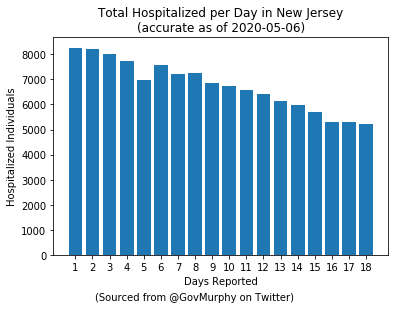

In [15]:
fig = plt.figure()
ax = fig.add_subplot()
ax.bar(hospDayCount,hospitalized)
ax.set_title("Total Hospitalized per Day in New Jersey\n(accurate as of {})".format(datetime.date.today()))
ax.set_ylabel('Hospitalized Individuals')
ax.set_xlabel('Days Reported')
ax.set_xticks(hospDayCount);
ax.text(2.15,-1800,"(Sourced from @GovMurphy on Twitter)");